In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"weather_mood_merged.csv")

# Load mood data
spain_mood = pd.read_csv("spain_data.csv")
sweden_mood = pd.read_csv("sweden_data.csv")

In [2]:
df.head()
df.columns

Index(['datetime', 'temp', 'humidity', 'precip', 'windspeed', 'cloudcover',
       'visibility', 'uvindex', 'city', 'year_month', 'year', 'month', 'day',
       'day_of_week', 'season', 'temp_roll7', 'country_x', 'n_x', 'score_x',
       'date_x', 'country_y', 'n_y', 'score_y', 'date_y'],
      dtype='object')

In [3]:
spain_mood.head()
sweden_mood.head()
spain_mood.columns
sweden_mood.columns

Index(['date', 'country', 'n', 'score'], dtype='object')

In [4]:
weather_df = pd.read_csv(r"weather_mood_merged.csv")
spain_df = pd.read_csv("spain_data.csv")
sweden_df = pd.read_csv("sweden_data.csv")

In [5]:
print("Weather columns:", weather_df.columns)
print("Spain mood columns:", spain_df.columns)
print("Sweden mood columns:", sweden_df.columns)

Weather columns: Index(['datetime', 'temp', 'humidity', 'precip', 'windspeed', 'cloudcover',
       'visibility', 'uvindex', 'city', 'year_month', 'year', 'month', 'day',
       'day_of_week', 'season', 'temp_roll7', 'country_x', 'n_x', 'score_x',
       'date_x', 'country_y', 'n_y', 'score_y', 'date_y'],
      dtype='object')
Spain mood columns: Index(['date', 'country', 'n', 'score'], dtype='object')
Sweden mood columns: Index(['date', 'country', 'n', 'score'], dtype='object')


In [6]:
spain_df.rename(columns={"date_column_name": "datetime"}, inplace=True)
sweden_df.rename(columns={"date_column_name": "datetime"}, inplace=True)

In [7]:
spain_df.rename(columns={"date": "datetime"}, inplace=True)
sweden_df.rename(columns={"date": "datetime"}, inplace=True)

In [8]:
weather_df["datetime"] = pd.to_datetime(weather_df["datetime"])
spain_df["date"] = pd.to_datetime(spain_df["datetime"])
sweden_df["date"] = pd.to_datetime(sweden_df["datetime"])

In [9]:
print("🇪🇸 Spain datetime dtype:", spain_df["datetime"].dtype)
print("🇸🇪 Sweden datetime dtype:", sweden_df["datetime"].dtype)

print("\nSample values from Spain:")
print(spain_df["datetime"].head())

print("\nSample values from Sweden:")
print(sweden_df["datetime"].head())

🇪🇸 Spain datetime dtype: object
🇸🇪 Sweden datetime dtype: object

Sample values from Spain:
0    2019-01-01
1    2019-01-02
2    2019-01-03
3    2019-01-04
4    2019-01-05
Name: datetime, dtype: object

Sample values from Sweden:
0    2019-01-01
1    2019-01-02
2    2019-01-03
3    2019-01-04
4    2019-01-05
Name: datetime, dtype: object


In [10]:
spain_df["datetime"] = pd.to_datetime(spain_df["datetime"])
sweden_df["datetime"] = pd.to_datetime(sweden_df["datetime"])

In [11]:
print("🇪🇸 Spain datetime dtype:", spain_df["datetime"].dtype)
print("🇸🇪 Sweden datetime dtype:", sweden_df["datetime"].dtype)

🇪🇸 Spain datetime dtype: datetime64[ns]
🇸🇪 Sweden datetime dtype: datetime64[ns]


In [12]:
spain_df["city"] = "Barcelona"
sweden_df["city"] = "Stockholm"

In [13]:
mood_df = pd.concat([spain_df, sweden_df], ignore_index=True)

In [14]:
merged_df = pd.merge(weather_df, mood_df, on=["datetime", "city"], how="inner")

In [15]:
print(merged_df.shape)
merged_df.head()

(3202, 28)


,datetime,temp,humidity,precip,windspeed,cloudcover,visibility,uvindex,city,year_month,...,score_x,date_x,country_y,n_y,score_y,date_y,country,n,score,date
0,2019-01-01,8.8,76.3,0.0,16.5,22.3,15.6,4.0,Barcelona,2019-01,...,0.632933,2019-01-01,Spain,74727,0.632933,2019-01-01,Spain,74727,0.632933,2019-01-01
1,2019-01-02,7.3,67.7,0.0,20.2,5.8,16.4,4.0,Barcelona,2019-01,...,0.597488,2019-01-02,Spain,73857,0.597488,2019-01-02,Spain,73857,0.597488,2019-01-02
2,2019-01-03,5.8,72.7,0.0,17.9,5.6,15.0,4.0,Barcelona,2019-01,...,0.590331,2019-01-03,Spain,77294,0.590331,2019-01-03,Spain,77294,0.590331,2019-01-03
3,2019-01-04,5.3,74.7,0.0,16.5,19.9,13.4,4.0,Barcelona,2019-01,...,0.592296,2019-01-04,Spain,74888,0.592296,2019-01-04,Spain,74888,0.592296,2019-01-04
4,2019-01-05,6.8,66.9,0.0,16.8,11.3,13.1,4.0,Barcelona,2019-01,...,0.597714,2019-01-05,Spain,78497,0.597714,2019-01-05,Spain,78497,0.597714,2019-01-05


In [16]:
print(merged_df.isna().sum())

datetime       0
temp           0
humidity       0
precip         0
windspeed      0
cloudcover     0
visibility     0
uvindex        0
city           0
year_month     0
year           0
month          0
day            0
day_of_week    0
season         0
temp_roll7     0
country_x      0
n_x            0
score_x        0
date_x         0
country_y      0
n_y            0
score_y        0
date_y         0
country        0
n              0
score          0
date           0
dtype: int64


In [17]:
merged_df.to_csv("weather_mood_merged.csv", index=False)

In [18]:
# Define bins and labels
bins = [0.0, 0.2, 0.35, 0.5, 0.65, 0.8, 1.0]
labels = ['Very Sad / Depressed', 'Sad', 'Slightly Sad', 'Neutral / Mixed', 'Positive', 'Very Positive']
# Apply categorisation to both DataFrames
merged_df['sentiment_category'] = pd.cut(merged_df['score_x'], bins=bins, labels=labels, include_lowest=True)


In [19]:
merged_df

,datetime,temp,humidity,precip,windspeed,cloudcover,visibility,uvindex,city,year_month,...,date_x,country_y,n_y,score_y,date_y,country,n,score,date,sentiment_category
0,2019-01-01,8.8,76.3,0.0,16.5,22.3,15.6,4.0,Barcelona,2019-01,...,2019-01-01,Spain,74727,0.632933,2019-01-01,Spain,74727,0.632933,2019-01-01,Neutral / Mixed
1,2019-01-02,7.3,67.7,0.0,20.2,5.8,16.4,4.0,Barcelona,2019-01,...,2019-01-02,Spain,73857,0.597488,2019-01-02,Spain,73857,0.597488,2019-01-02,Neutral / Mixed
2,2019-01-03,5.8,72.7,0.0,17.9,5.6,15.0,4.0,Barcelona,2019-01,...,2019-01-03,Spain,77294,0.590331,2019-01-03,Spain,77294,0.590331,2019-01-03,Neutral / Mixed
3,2019-01-04,5.3,74.7,0.0,16.5,19.9,13.4,4.0,Barcelona,2019-01,...,2019-01-04,Spain,74888,0.592296,2019-01-04,Spain,74888,0.592296,2019-01-04,Neutral / Mixed
4,2019-01-05,6.8,66.9,0.0,16.8,11.3,13.1,4.0,Barcelona,2019-01,...,2019-01-05,Spain,78497,0.597714,2019-01-05,Spain,78497,0.597714,2019-01-05,Neutral / Mixed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,2023-06-13,18.5,40.8,0.0,18.0,4.0,12.2,8.0,Stockholm,2023-06,...,2023-06-13,Sweden,5061,0.595705,2023-06-13,Sweden,5061,0.595705,2023-06-13,Neutral / Mixed
3198,2023-06-14,19.9,42.9,0.0,16.3,22.0,12.6,7.0,Stockholm,2023-06,...,2023-06-14,Sweden,3011,0.618195,2023-06-14,Sweden,3011,0.618195,2023-06-14,Neutral / Mixed
3199,2023-06-15,20.3,40.6,0.0,14.6,10.7,12.2,8.0,Stockholm,2023-06,...,2023-06-15,Sweden,4767,0.601552,2023-06-15,Sweden,4767,0.601552,2023-06-15,Neutral / Mixed
3200,2023-06-16,21.1,43.8,0.0,17.7,30.9,12.3,7.0,Stockholm,2023-06,...,2023-06-16,Sweden,736,0.609218,2023-06-16,Sweden,736,0.609218,2023-06-16,Neutral / Mixed


In [20]:
# Filter the dataset to the period from March 1 to June 30, 2020
df_filtered = df[(df['datetime'] >= '2020-03-01') & (df['datetime'] <= '2020-06-30')]


In [21]:
df_filtered

,datetime,temp,humidity,precip,windspeed,cloudcover,visibility,uvindex,city,year_month,...,season,temp_roll7,country_x,n_x,score_x,date_x,country_y,n_y,score_y,date_y
424,2020-03-01,15.7,67.1,0.000,30.6,30.7,13.0,6.0,Barcelona,2020-03,...,spring,13.757143,Spain,90871,0.591546,2020-03-01,Spain,90871,0.591546,2020-03-01
425,2020-03-02,14.8,60.4,2.453,46.9,34.2,14.3,7.0,Barcelona,2020-03,...,spring,13.900000,Spain,81588,0.592561,2020-03-02,Spain,81588,0.592561,2020-03-02
426,2020-03-03,11.6,59.0,0.000,31.3,31.0,16.0,8.0,Barcelona,2020-03,...,spring,13.857143,Spain,78378,0.596158,2020-03-03,Spain,78378,0.596158,2020-03-03
427,2020-03-04,12.7,70.9,0.000,17.9,41.5,14.7,5.0,Barcelona,2020-03,...,spring,13.785714,Spain,82855,0.596050,2020-03-04,Spain,82855,0.596050,2020-03-04
428,2020-03-05,14.8,69.2,0.000,33.1,38.5,13.8,5.0,Barcelona,2020-03,...,spring,13.885714,Spain,84624,0.598306,2020-03-05,Spain,84624,0.598306,2020-03-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,2020-06-26,23.5,51.1,0.000,19.0,2.0,26.7,8.0,Stockholm,2020-06,...,summer,21.614286,Sweden,5759,0.601414,2020-06-26,Sweden,5759,0.601414,2020-06-26
2143,2020-06-27,24.1,50.7,0.000,19.8,20.7,25.3,8.0,Stockholm,2020-06,...,summer,22.185714,Sweden,5564,0.605532,2020-06-27,Sweden,5564,0.605532,2020-06-27
2144,2020-06-28,23.8,59.9,0.000,23.0,48.8,26.3,8.0,Stockholm,2020-06,...,summer,22.885714,Sweden,5948,0.583170,2020-06-28,Sweden,5948,0.583170,2020-06-28
2145,2020-06-29,20.7,66.5,1.904,15.0,64.6,24.0,5.0,Stockholm,2020-06,...,summer,23.171429,Sweden,5517,0.585441,2020-06-29,Sweden,5517,0.585441,2020-06-29


In [22]:
def classify_weather(row):
    if row['precip'] > 0.1:
        return 'Rainy'
    elif row['temp'] < 10:
        return 'Cold'
    elif row['cloudcover'] > 60:
        return 'Cloudy'
    else:
        return 'Sunny'

df_filtered['weather_type'] = df_filtered.apply(classify_weather, axis=1)
df_filtered

/var/folders/bp/q0jpdzq126j54kx_lzjc4dcm0000gn/T/ipykernel_87579/1255913592.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['weather_type'] = df_filtered.apply(classify_weather, axis=1)


,datetime,temp,humidity,precip,windspeed,cloudcover,visibility,uvindex,city,year_month,...,temp_roll7,country_x,n_x,score_x,date_x,country_y,n_y,score_y,date_y,weather_type
424,2020-03-01,15.7,67.1,0.000,30.6,30.7,13.0,6.0,Barcelona,2020-03,...,13.757143,Spain,90871,0.591546,2020-03-01,Spain,90871,0.591546,2020-03-01,Sunny
425,2020-03-02,14.8,60.4,2.453,46.9,34.2,14.3,7.0,Barcelona,2020-03,...,13.900000,Spain,81588,0.592561,2020-03-02,Spain,81588,0.592561,2020-03-02,Rainy
426,2020-03-03,11.6,59.0,0.000,31.3,31.0,16.0,8.0,Barcelona,2020-03,...,13.857143,Spain,78378,0.596158,2020-03-03,Spain,78378,0.596158,2020-03-03,Sunny
427,2020-03-04,12.7,70.9,0.000,17.9,41.5,14.7,5.0,Barcelona,2020-03,...,13.785714,Spain,82855,0.596050,2020-03-04,Spain,82855,0.596050,2020-03-04,Sunny
428,2020-03-05,14.8,69.2,0.000,33.1,38.5,13.8,5.0,Barcelona,2020-03,...,13.885714,Spain,84624,0.598306,2020-03-05,Spain,84624,0.598306,2020-03-05,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,2020-06-26,23.5,51.1,0.000,19.0,2.0,26.7,8.0,Stockholm,2020-06,...,21.614286,Sweden,5759,0.601414,2020-06-26,Sweden,5759,0.601414,2020-06-26,Sunny
2143,2020-06-27,24.1,50.7,0.000,19.8,20.7,25.3,8.0,Stockholm,2020-06,...,22.185714,Sweden,5564,0.605532,2020-06-27,Sweden,5564,0.605532,2020-06-27,Sunny
2144,2020-06-28,23.8,59.9,0.000,23.0,48.8,26.3,8.0,Stockholm,2020-06,...,22.885714,Sweden,5948,0.583170,2020-06-28,Sweden,5948,0.583170,2020-06-28,Sunny
2145,2020-06-29,20.7,66.5,1.904,15.0,64.6,24.0,5.0,Stockholm,2020-06,...,23.171429,Sweden,5517,0.585441,2020-06-29,Sweden,5517,0.585441,2020-06-29,Rainy


In [23]:
# Define sentiment bins and labels
bins = [0.0, 0.2, 0.35, 0.5, 0.65, 0.8, 1.0]
labels = ['Very Sad / Depressed', 'Sad', 'Slightly Sad', 'Neutral / Mixed', 'Positive', 'Very Positive']

# Apply binning
df_filtered['sentiment_binned'] = pd.cut(df_filtered['score'], bins=bins, labels=labels, include_lowest=True)
df_filtered

KeyError: 'score'

In [ ]:
grouped = df_filtered.groupby(['country', 'weather_type']).agg({
    'score': 'mean',
    'n': 'mean'
}).reset_index()


In [ ]:
grouped

,country,weather_type,score,n
0,Spain,Cloudy,0.575152,95959.000000
1,Spain,Cold,0.582738,95342.500000
2,Spain,Rainy,0.585555,88075.147059
3,Spain,Sunny,0.586925,88601.357143
4,Sweden,Cloudy,0.595433,4969.250000
5,Sweden,Cold,0.594608,5405.631579
6,Sweden,Rainy,0.593376,5422.977273
7,Sweden,Sunny,0.601861,5285.722222


📈 Example explained:
Line 1:

- Spain — Cloudy — score = 0.575 — tweets = 95,959
In Spain, on cloudy days during March-June 2020:
The average mood was 0.575 (slightly below neutral).
An average of 95,959 tweets were posted on those days.

Line 7 (last):
- Sweden — Sunny — score = 0.601 — tweets = 5,285
In Sweden, on sunny days:
The average mood was 0.602 (slightly more positive).
There were, on average, 5,285 tweets.

🧠 What preliminary conclusions can you draw?

About mood (score):
- Sunny days have the highest mood in both countries.
- In general, cloudy or cold days have lower scores (slightly).

About the number of tweets (n):
- Spain has many more tweets than Sweden (due to population size, language, social media use, etc.).
- In Spain, cloudy and cold days have more tweets than sunny days.
- In Sweden, the difference is not as marked, but sunny days also have fewer tweets.

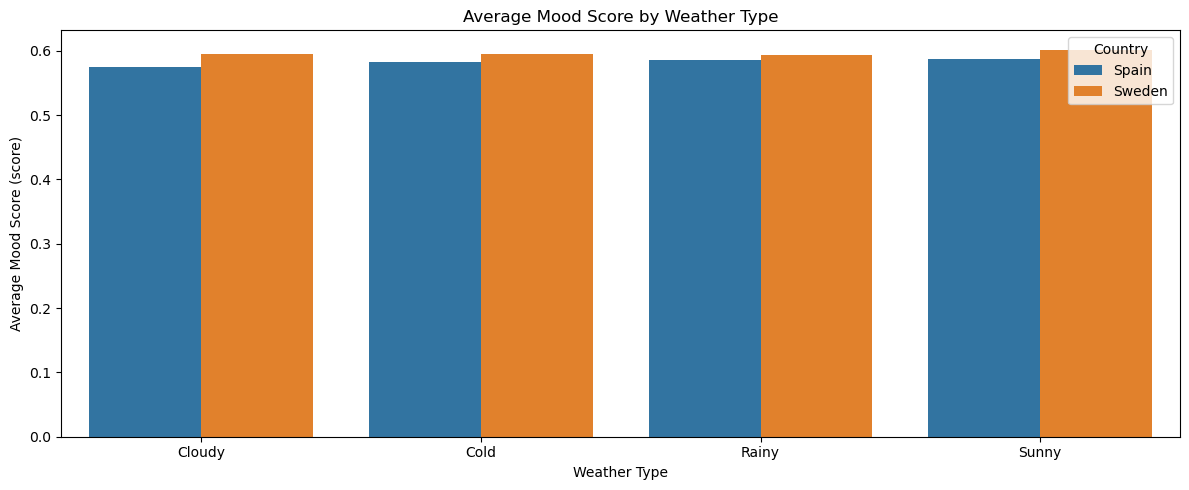

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.barplot(data=grouped, x='weather_type', y='score', hue='country')
plt.title('Average Mood Score by Weather Type')
plt.ylabel('Average Mood Score (score)')
plt.xlabel('Weather Type')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


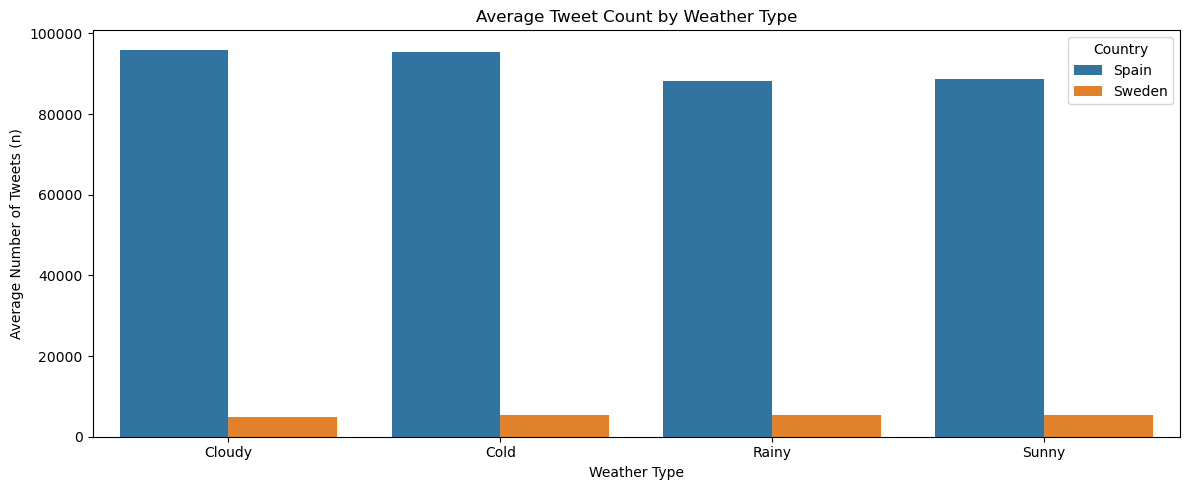

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(data=grouped, x='weather_type', y='n', hue='country')
plt.title('Average Tweet Count by Weather Type')
plt.ylabel('Average Number of Tweets (n)')
plt.xlabel('Weather Type')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


In [ ]:
df = pd.read_csv("weather_mood_merged.csv")


In [ ]:
df

,datetime,temp,humidity,precip,windspeed,cloudcover,visibility,uvindex,city,year_month,...,season,temp_roll7,country_x,n_x,score_x,date_x,country_y,n_y,score_y,date_y
0,2019-01-01,8.8,76.3,0.0,16.5,22.3,15.6,4.0,Barcelona,2019-01,...,winter,8.800000,Spain,74727,0.632933,2019-01-01,Spain,74727,0.632933,2019-01-01
1,2019-01-02,7.3,67.7,0.0,20.2,5.8,16.4,4.0,Barcelona,2019-01,...,winter,8.050000,Spain,73857,0.597488,2019-01-02,Spain,73857,0.597488,2019-01-02
2,2019-01-03,5.8,72.7,0.0,17.9,5.6,15.0,4.0,Barcelona,2019-01,...,winter,7.300000,Spain,77294,0.590331,2019-01-03,Spain,77294,0.590331,2019-01-03
3,2019-01-04,5.3,74.7,0.0,16.5,19.9,13.4,4.0,Barcelona,2019-01,...,winter,6.800000,Spain,74888,0.592296,2019-01-04,Spain,74888,0.592296,2019-01-04
4,2019-01-05,6.8,66.9,0.0,16.8,11.3,13.1,4.0,Barcelona,2019-01,...,winter,6.800000,Spain,78497,0.597714,2019-01-05,Spain,78497,0.597714,2019-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,2023-06-13,18.5,40.8,0.0,18.0,4.0,12.2,8.0,Stockholm,2023-06,...,summer,15.028571,Sweden,5061,0.595705,2023-06-13,Sweden,5061,0.595705,2023-06-13
3198,2023-06-14,19.9,42.9,0.0,16.3,22.0,12.6,7.0,Stockholm,2023-06,...,summer,15.742857,Sweden,3011,0.618195,2023-06-14,Sweden,3011,0.618195,2023-06-14
3199,2023-06-15,20.3,40.6,0.0,14.6,10.7,12.2,8.0,Stockholm,2023-06,...,summer,16.571429,Sweden,4767,0.601552,2023-06-15,Sweden,4767,0.601552,2023-06-15
3200,2023-06-16,21.1,43.8,0.0,17.7,30.9,12.3,7.0,Stockholm,2023-06,...,summer,17.785714,Sweden,736,0.609218,2023-06-16,Sweden,736,0.609218,2023-06-16


In [ ]:
# Force datetime format just in case
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Define period ranges
pre_covid_years = [2018, 2019]
covid_year = [2020]
post_covid_years = [2021, 2022, 2023]

# Extract year
df['year'] = df['datetime'].dt.year

# Filter by period and assign a new column
def assign_period(year):
    if year in pre_covid_years:
        return "Pre-COVID"
    elif year in covid_year:
        return "COVID"
    elif year in post_covid_years:
        return "Post-COVID"
    else:
        return "Other"

df['period'] = df['year'].apply(assign_period)

# Keep only the relevant periods
df = df[df['period'].isin(["Pre-COVID", "COVID", "Post-COVID"])]

# Add day-month for matching across years
df['day_month'] = df['datetime'].dt.strftime('%m-%d')


In [ ]:
print(df['datetime'].dtype)

datetime64[ns]


In [ ]:
# Define day types con formato 'MM-DD' para comparar con df['day_month']
rainy_days_spain = ["04-19", "04-21", "04-13", "04-20", "04-22"]
cold_days_spain = ["03-12", "03-04", "04-28", "05-01", "05-04"]
sunny_days_spain = ["03-26", "05-22", "05-28", "05-31", "05-25"]

rainy_days_sweden = ["03-26", "03-27", "03-25", "03-30", "03-31"]
cold_days_sweden = ["03-14", "03-30", "03-21", "03-22", "03-29"]
sunny_days_sweden = ["05-28", "05-16", "05-24", "05-20", "05-22"]

day_types = {
    'Spain': {
        'Rainy': rainy_days_spain,
        'Cold': cold_days_spain,
        'Sunny': sunny_days_spain
    },
    'Sweden': {
        'Rainy': rainy_days_sweden,
        'Cold': cold_days_sweden,
        'Sunny': sunny_days_sweden
    }
}

In [ ]:
df

,datetime,temp,humidity,precip,windspeed,cloudcover,visibility,uvindex,city,year_month,...,country_x,n_x,score_x,date_x,country_y,n_y,score_y,date_y,period,day_month
0,2019-01-01,8.8,76.3,0.0,16.5,22.3,15.6,4.0,Barcelona,2019-01,...,Spain,74727,0.632933,2019-01-01,Spain,74727,0.632933,2019-01-01,Pre-COVID,01-01
1,2019-01-02,7.3,67.7,0.0,20.2,5.8,16.4,4.0,Barcelona,2019-01,...,Spain,73857,0.597488,2019-01-02,Spain,73857,0.597488,2019-01-02,Pre-COVID,01-02
2,2019-01-03,5.8,72.7,0.0,17.9,5.6,15.0,4.0,Barcelona,2019-01,...,Spain,77294,0.590331,2019-01-03,Spain,77294,0.590331,2019-01-03,Pre-COVID,01-03
3,2019-01-04,5.3,74.7,0.0,16.5,19.9,13.4,4.0,Barcelona,2019-01,...,Spain,74888,0.592296,2019-01-04,Spain,74888,0.592296,2019-01-04,Pre-COVID,01-04
4,2019-01-05,6.8,66.9,0.0,16.8,11.3,13.1,4.0,Barcelona,2019-01,...,Spain,78497,0.597714,2019-01-05,Spain,78497,0.597714,2019-01-05,Pre-COVID,01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,2023-06-13,18.5,40.8,0.0,18.0,4.0,12.2,8.0,Stockholm,2023-06,...,Sweden,5061,0.595705,2023-06-13,Sweden,5061,0.595705,2023-06-13,Post-COVID,06-13
3198,2023-06-14,19.9,42.9,0.0,16.3,22.0,12.6,7.0,Stockholm,2023-06,...,Sweden,3011,0.618195,2023-06-14,Sweden,3011,0.618195,2023-06-14,Post-COVID,06-14
3199,2023-06-15,20.3,40.6,0.0,14.6,10.7,12.2,8.0,Stockholm,2023-06,...,Sweden,4767,0.601552,2023-06-15,Sweden,4767,0.601552,2023-06-15,Post-COVID,06-15
3200,2023-06-16,21.1,43.8,0.0,17.7,30.9,12.3,7.0,Stockholm,2023-06,...,Sweden,736,0.609218,2023-06-16,Sweden,736,0.609218,2023-06-16,Post-COVID,06-16


In [ ]:
results = []

for country in ['Spain', 'Sweden']:
    for weather in ['Rainy', 'Cold', 'Sunny']:
        days_mmdd = day_types[country][weather]
        for period in ['Pre-COVID', 'COVID', 'Post-COVID']:
            subset = df[
                (df['country_y'] == country) &
                (df['period'] == period) &
                (df['day_month'].isin(days_mmdd))
            ]
            results.append({
                'country': country,
                'weather_type': weather,
                'period': period,
                'score_y': subset['score_y'].mean(),
                'n_y': subset['n_y'].mean()
            })

comparison_df = pd.DataFrame(results)
print(comparison_df)

   country weather_type      period   score_y           n_y
0    Spain        Rainy   Pre-COVID  0.591223  86852.400000
1    Spain        Rainy       COVID  0.585038  98303.200000
2    Spain        Rainy  Post-COVID  0.604801  53432.733333
3    Spain         Cold   Pre-COVID  0.593351  90340.800000
4    Spain         Cold       COVID  0.580812  93479.600000
5    Spain         Cold  Post-COVID  0.603843  61333.866667
6    Spain        Sunny   Pre-COVID  0.598227  88014.800000
7    Spain        Sunny       COVID  0.586961  83810.600000
8    Spain        Sunny  Post-COVID  0.605365  54210.428571
9   Sweden        Rainy   Pre-COVID  0.588482   6682.800000
10  Sweden        Rainy       COVID  0.590176   5145.600000
11  Sweden        Rainy  Post-COVID  0.600445   4502.900000
12  Sweden         Cold   Pre-COVID  0.595300   6863.800000
13  Sweden         Cold       COVID  0.584599   5500.800000
14  Sweden         Cold  Post-COVID  0.590126   4100.153846
15  Sweden        Sunny   Pre-COVID  0.5

/var/folders/bp/q0jpdzq126j54kx_lzjc4dcm0000gn/T/ipykernel_84724/1609043015.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


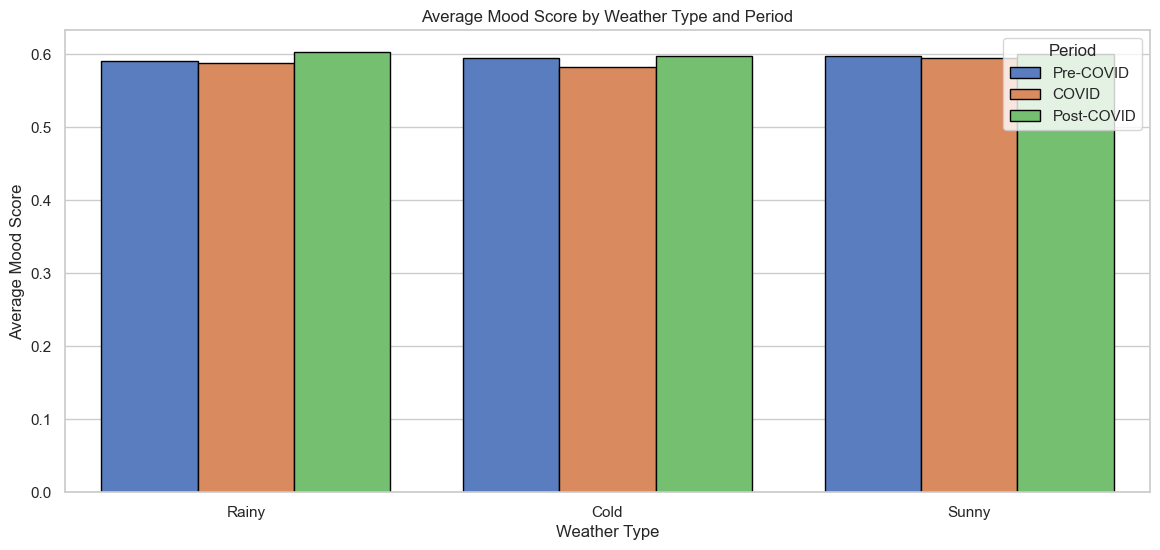

/var/folders/bp/q0jpdzq126j54kx_lzjc4dcm0000gn/T/ipykernel_84724/1609043015.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


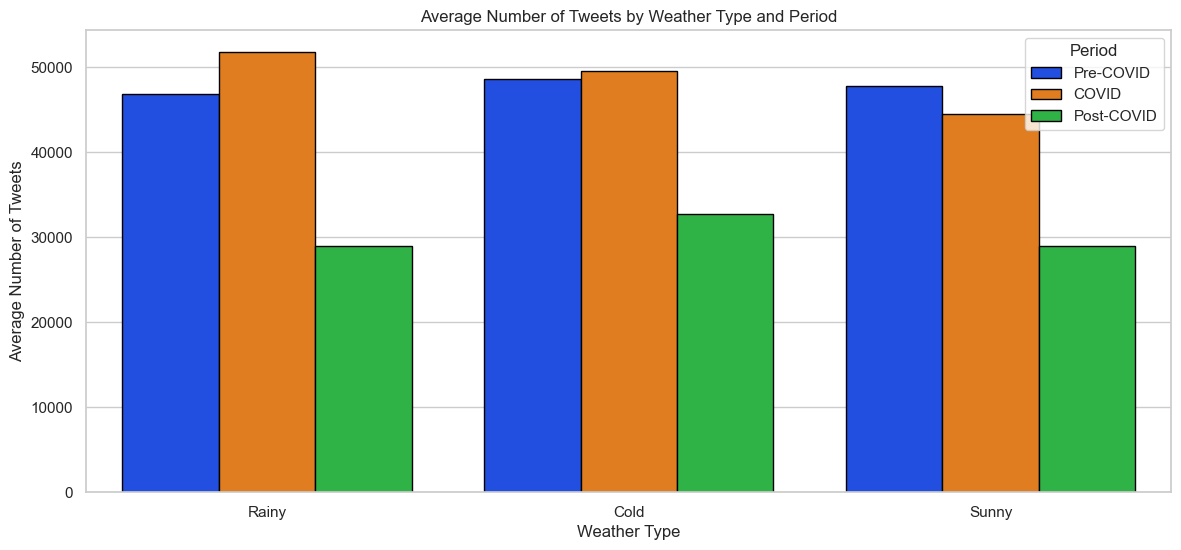

/var/folders/bp/q0jpdzq126j54kx_lzjc4dcm0000gn/T/ipykernel_84724/1609043015.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


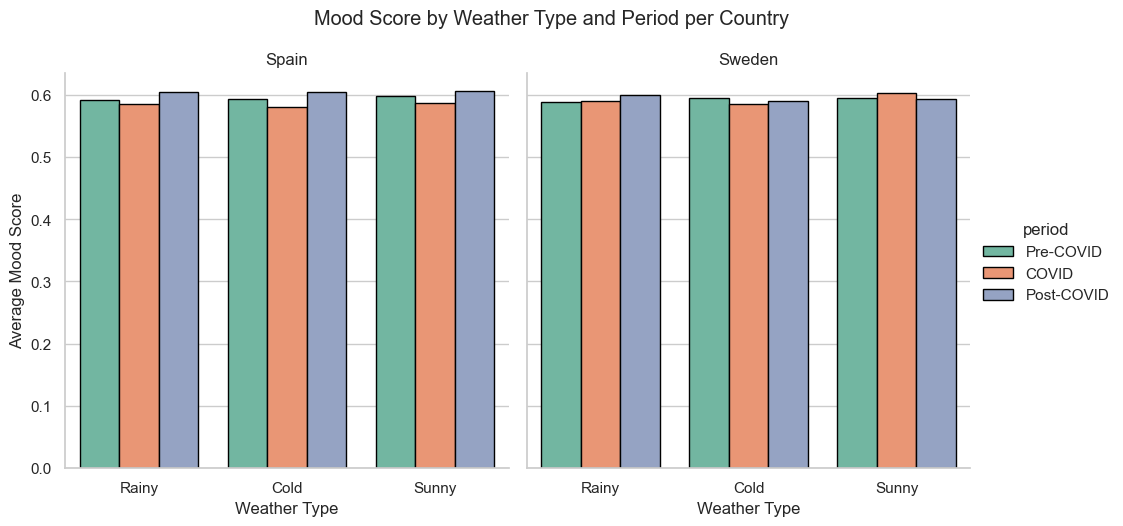

/var/folders/bp/q0jpdzq126j54kx_lzjc4dcm0000gn/T/ipykernel_84724/1609043015.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


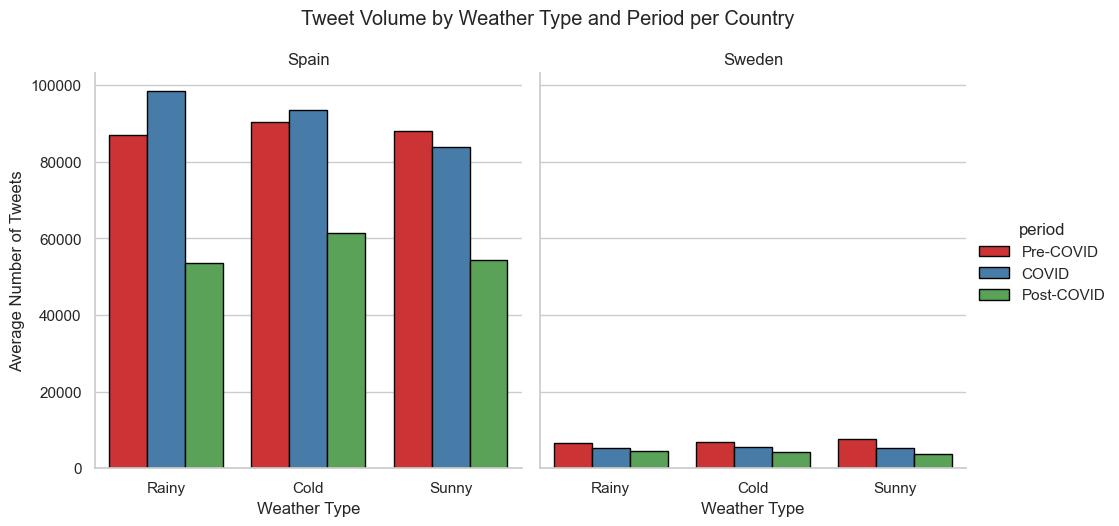

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1) Mood scores by weather type, country, and period

plt.figure(figsize=(14, 6))
sns.barplot(
    data=comparison_df,
    x='weather_type',
    y='score_y',
    hue='period',
    ci=None,
    palette='muted',
    edgecolor='black'
)
plt.title('Average Mood Score by Weather Type and Period')
plt.xlabel('Weather Type')
plt.ylabel('Average Mood Score')
plt.legend(title='Period')
plt.show()

# 2) Tweet volume by weather type, country, and period

plt.figure(figsize=(14, 6))
sns.barplot(
    data=comparison_df,
    x='weather_type',
    y='n_y',
    hue='period',
    ci=None,
    palette='bright',
    edgecolor='black'
)
plt.title('Average Number of Tweets by Weather Type and Period')
plt.xlabel('Weather Type')
plt.ylabel('Average Number of Tweets')
plt.legend(title='Period')
plt.show()

# 3) Mood score by weather type and period, separated by country (Faceted plot)

g = sns.catplot(
    data=comparison_df,
    x='weather_type',
    y='score_y',
    hue='period',
    col='country',
    kind='bar',
    height=5,
    aspect=1,
    palette='Set2',
    edgecolor='black',
    ci=None
)
g.set_axis_labels("Weather Type", "Average Mood Score")
g.set_titles("{col_name}")
g.fig.suptitle("Mood Score by Weather Type and Period per Country", y=1.05)
plt.show()

# 4) Tweet volume by weather type and period, separated by country

g = sns.catplot(
    data=comparison_df,
    x='weather_type',
    y='n_y',
    hue='period',
    col='country',
    kind='bar',
    height=5,
    aspect=1,
    palette='Set1',
    edgecolor='black',
    ci=None
)
g.set_axis_labels("Weather Type", "Average Number of Tweets")
g.set_titles("{col_name}")
g.fig.suptitle("Tweet Volume by Weather Type and Period per Country", y=1.05)
plt.show()


In [ ]:
!pip install scikit-posthocs

In [ ]:
df_daily = df.copy()
df_daily

,datetime,temp,humidity,precip,windspeed,cloudcover,visibility,uvindex,city,year_month,...,country_x,n_x,score_x,date_x,country_y,n_y,score_y,date_y,period,day_month
0,2019-01-01,8.8,76.3,0.0,16.5,22.3,15.6,4.0,Barcelona,2019-01,...,Spain,74727,0.632933,2019-01-01,Spain,74727,0.632933,2019-01-01,Pre-COVID,01-01
1,2019-01-02,7.3,67.7,0.0,20.2,5.8,16.4,4.0,Barcelona,2019-01,...,Spain,73857,0.597488,2019-01-02,Spain,73857,0.597488,2019-01-02,Pre-COVID,01-02
2,2019-01-03,5.8,72.7,0.0,17.9,5.6,15.0,4.0,Barcelona,2019-01,...,Spain,77294,0.590331,2019-01-03,Spain,77294,0.590331,2019-01-03,Pre-COVID,01-03
3,2019-01-04,5.3,74.7,0.0,16.5,19.9,13.4,4.0,Barcelona,2019-01,...,Spain,74888,0.592296,2019-01-04,Spain,74888,0.592296,2019-01-04,Pre-COVID,01-04
4,2019-01-05,6.8,66.9,0.0,16.8,11.3,13.1,4.0,Barcelona,2019-01,...,Spain,78497,0.597714,2019-01-05,Spain,78497,0.597714,2019-01-05,Pre-COVID,01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,2023-06-13,18.5,40.8,0.0,18.0,4.0,12.2,8.0,Stockholm,2023-06,...,Sweden,5061,0.595705,2023-06-13,Sweden,5061,0.595705,2023-06-13,Post-COVID,06-13
3198,2023-06-14,19.9,42.9,0.0,16.3,22.0,12.6,7.0,Stockholm,2023-06,...,Sweden,3011,0.618195,2023-06-14,Sweden,3011,0.618195,2023-06-14,Post-COVID,06-14
3199,2023-06-15,20.3,40.6,0.0,14.6,10.7,12.2,8.0,Stockholm,2023-06,...,Sweden,4767,0.601552,2023-06-15,Sweden,4767,0.601552,2023-06-15,Post-COVID,06-15
3200,2023-06-16,21.1,43.8,0.0,17.7,30.9,12.3,7.0,Stockholm,2023-06,...,Sweden,736,0.609218,2023-06-16,Sweden,736,0.609218,2023-06-16,Post-COVID,06-16


In [ ]:
df_daily.columns

Index(['datetime', 'temp', 'humidity', 'precip', 'windspeed', 'cloudcover',
       'visibility', 'uvindex', 'city', 'year_month', 'year', 'month', 'day',
       'day_of_week', 'season', 'temp_roll7', 'country_x', 'n_x', 'score_x',
       'date_x', 'country_y', 'n_y', 'score_y', 'date_y', 'period',
       'day_month'],
      dtype='object')

In [ ]:
def classify_weather(row):
    if row['precip'] > 0.5:
        return 'Rainy'
    elif row['temp'] < 10:
        return 'Cold'
    else:
        return 'Sunny'

df['weather_type'] = df.apply(classify_weather, axis=1)


In [ ]:
df

,datetime,temp,humidity,precip,windspeed,cloudcover,visibility,uvindex,city,year_month,...,n_x,score_x,date_x,country_y,n_y,score_y,date_y,period,day_month,weather_type
0,2019-01-01,8.8,76.3,0.0,16.5,22.3,15.6,4.0,Barcelona,2019-01,...,74727,0.632933,2019-01-01,Spain,74727,0.632933,2019-01-01,Pre-COVID,01-01,Cold
1,2019-01-02,7.3,67.7,0.0,20.2,5.8,16.4,4.0,Barcelona,2019-01,...,73857,0.597488,2019-01-02,Spain,73857,0.597488,2019-01-02,Pre-COVID,01-02,Cold
2,2019-01-03,5.8,72.7,0.0,17.9,5.6,15.0,4.0,Barcelona,2019-01,...,77294,0.590331,2019-01-03,Spain,77294,0.590331,2019-01-03,Pre-COVID,01-03,Cold
3,2019-01-04,5.3,74.7,0.0,16.5,19.9,13.4,4.0,Barcelona,2019-01,...,74888,0.592296,2019-01-04,Spain,74888,0.592296,2019-01-04,Pre-COVID,01-04,Cold
4,2019-01-05,6.8,66.9,0.0,16.8,11.3,13.1,4.0,Barcelona,2019-01,...,78497,0.597714,2019-01-05,Spain,78497,0.597714,2019-01-05,Pre-COVID,01-05,Cold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,2023-06-13,18.5,40.8,0.0,18.0,4.0,12.2,8.0,Stockholm,2023-06,...,5061,0.595705,2023-06-13,Sweden,5061,0.595705,2023-06-13,Post-COVID,06-13,Sunny
3198,2023-06-14,19.9,42.9,0.0,16.3,22.0,12.6,7.0,Stockholm,2023-06,...,3011,0.618195,2023-06-14,Sweden,3011,0.618195,2023-06-14,Post-COVID,06-14,Sunny
3199,2023-06-15,20.3,40.6,0.0,14.6,10.7,12.2,8.0,Stockholm,2023-06,...,4767,0.601552,2023-06-15,Sweden,4767,0.601552,2023-06-15,Post-COVID,06-15,Sunny
3200,2023-06-16,21.1,43.8,0.0,17.7,30.9,12.3,7.0,Stockholm,2023-06,...,736,0.609218,2023-06-16,Sweden,736,0.609218,2023-06-16,Post-COVID,06-16,Sunny


In [ ]:
def classify_weather(row):
    if row['precip'] > 0.5:
        return 'Rainy'
    elif row['temp'] < 10:
        return 'Cold'
    else:
        return 'Sunny'

df_daily['weather_type'] = df_daily.apply(classify_weather, axis=1)

In [ ]:
df_daily

,datetime,temp,humidity,precip,windspeed,cloudcover,visibility,uvindex,city,year_month,...,n_x,score_x,date_x,country_y,n_y,score_y,date_y,period,day_month,weather_type
0,2019-01-01,8.8,76.3,0.0,16.5,22.3,15.6,4.0,Barcelona,2019-01,...,74727,0.632933,2019-01-01,Spain,74727,0.632933,2019-01-01,Pre-COVID,01-01,Cold
1,2019-01-02,7.3,67.7,0.0,20.2,5.8,16.4,4.0,Barcelona,2019-01,...,73857,0.597488,2019-01-02,Spain,73857,0.597488,2019-01-02,Pre-COVID,01-02,Cold
2,2019-01-03,5.8,72.7,0.0,17.9,5.6,15.0,4.0,Barcelona,2019-01,...,77294,0.590331,2019-01-03,Spain,77294,0.590331,2019-01-03,Pre-COVID,01-03,Cold
3,2019-01-04,5.3,74.7,0.0,16.5,19.9,13.4,4.0,Barcelona,2019-01,...,74888,0.592296,2019-01-04,Spain,74888,0.592296,2019-01-04,Pre-COVID,01-04,Cold
4,2019-01-05,6.8,66.9,0.0,16.8,11.3,13.1,4.0,Barcelona,2019-01,...,78497,0.597714,2019-01-05,Spain,78497,0.597714,2019-01-05,Pre-COVID,01-05,Cold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,2023-06-13,18.5,40.8,0.0,18.0,4.0,12.2,8.0,Stockholm,2023-06,...,5061,0.595705,2023-06-13,Sweden,5061,0.595705,2023-06-13,Post-COVID,06-13,Sunny
3198,2023-06-14,19.9,42.9,0.0,16.3,22.0,12.6,7.0,Stockholm,2023-06,...,3011,0.618195,2023-06-14,Sweden,3011,0.618195,2023-06-14,Post-COVID,06-14,Sunny
3199,2023-06-15,20.3,40.6,0.0,14.6,10.7,12.2,8.0,Stockholm,2023-06,...,4767,0.601552,2023-06-15,Sweden,4767,0.601552,2023-06-15,Post-COVID,06-15,Sunny
3200,2023-06-16,21.1,43.8,0.0,17.7,30.9,12.3,7.0,Stockholm,2023-06,...,736,0.609218,2023-06-16,Sweden,736,0.609218,2023-06-16,Post-COVID,06-16,Sunny


In [ ]:
df_analysis = df_daily[['country_y', 'weather_type', 'period', 'score_y', 'n_y', 'datetime']].copy()
df_analysis.rename(columns={'country_y': 'country', 'score_y': 'score', 'n_y': 'n'}, inplace=True)


In [ ]:
import scikit_posthocs as sp
import scipy.stats as stats
import pandas as pd

# Solo para asegurarnos que no haya NaNs en columnas clave
df_analysis = df_analysis.dropna(subset=['country', 'weather_type', 'period', 'score', 'n'])

results = []

for country in df_analysis['country'].unique():
    for weather in df_analysis['weather_type'].unique():
        for variable in ['score', 'n']:
            subset = df_analysis[(df_analysis['country'] == country) & (df_analysis['weather_type'] == weather)]
            groups = [subset[subset['period'] == p][variable].dropna() for p in ['Pre-COVID', 'COVID', 'Post-COVID']]
            if all(len(g) > 1 for g in groups):
                stat, p = stats.kruskal(*groups)
                results.append({
                    'country': country,
                    'weather_type': weather,
                    'variable': variable,
                    'kruskal_stat': stat,
                    'p_value': p
                })

results_df = pd.DataFrame(results)
print(results_df)

# Post-hoc si p < 0.05
for idx, row in results_df.iterrows():
    if row['p_value'] < 0.05:
        subset = df_analysis[(df_analysis['country'] == row['country']) & (df_analysis['weather_type'] == row['weather_type'])]
        data_for_posthoc = [subset[subset['period'] == p][row['variable']].dropna() for p in ['Pre-COVID', 'COVID', 'Post-COVID']]
        posthoc = sp.posthoc_dunn(data_for_posthoc, p_adjust='holm')
        print(f"\nPost-hoc for {row['country']} - {row['weather_type']} - {row['variable']}")
        print(posthoc)


   country weather_type variable  kruskal_stat       p_value
0    Spain         Cold    score     31.271450  1.619910e-07
1    Spain         Cold        n     15.343427  4.658190e-04
2    Spain        Sunny    score    264.034180  4.631337e-58
3    Spain        Sunny        n    236.812177  3.774758e-52
4    Spain        Rainy    score     69.173071  9.533637e-16
5    Spain        Rainy        n     58.641498  1.845697e-13
6   Sweden         Cold    score     23.085850  9.704461e-06
7   Sweden         Cold        n    198.978684  6.199087e-44
8   Sweden        Sunny    score     32.470244  8.895618e-08
9   Sweden        Sunny        n     82.368831  1.299678e-18
10  Sweden        Rainy    score     57.445403  3.356520e-13
11  Sweden        Rainy        n     97.646817  6.255514e-22

Post-hoc for Spain - Cold - score
              1         2             3
1  1.000000e+00  0.037423  1.125860e-07
2  3.742292e-02  1.000000  2.998523e-02
3  1.125860e-07  0.029985  1.000000e+00

Post-hoc fo

/var/folders/bp/q0jpdzq126j54kx_lzjc4dcm0000gn/T/ipykernel_87579/2987187692.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='datetime', freq='M'), 'city'


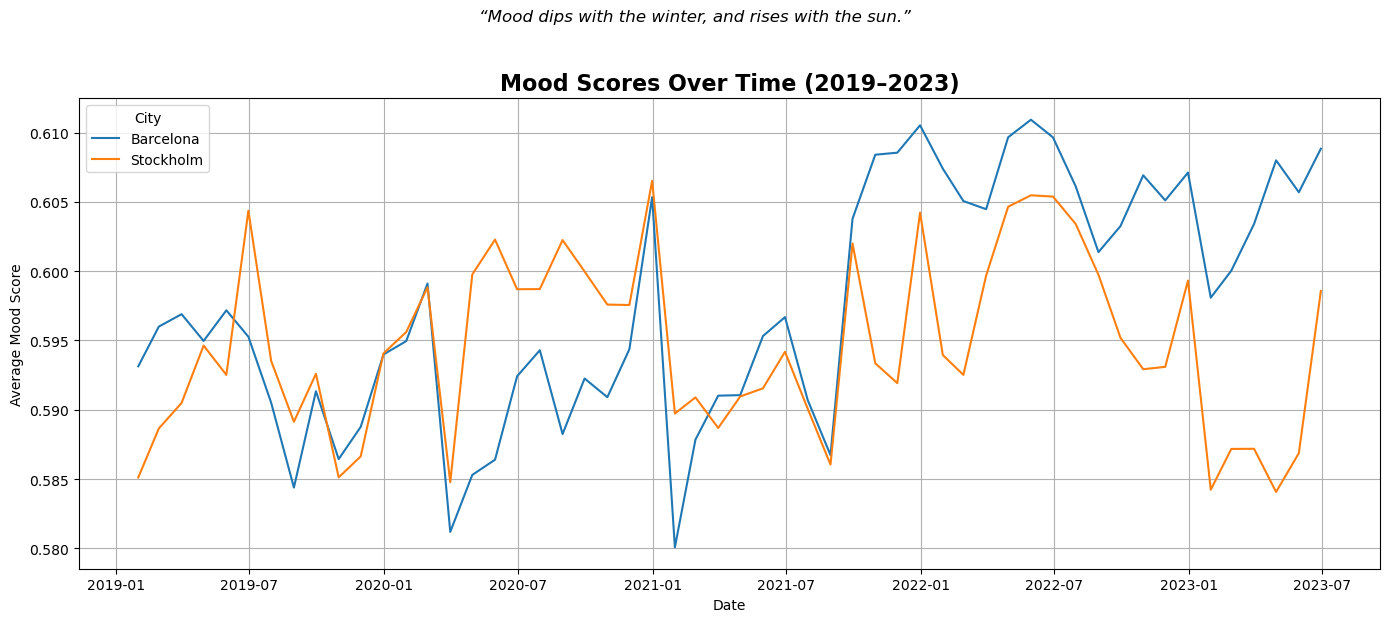

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Group by city and month to calculate average mood score
df_monthly = df.groupby([
    pd.Grouper(key='datetime', freq='M'), 'city'
]).agg(avg_mood=('score_x', 'mean')).reset_index()

# Plot
plt.figure(figsize=(14, 6))
for city in df_monthly['city'].unique():
    city_data = df_monthly[df_monthly['city'] == city]
    plt.plot(city_data['datetime'], city_data['avg_mood'], label=city)

# Add titles and labels
plt.title("Mood Scores Over Time (2019–2023)", fontsize=16, weight='bold')
plt.xlabel("Date")
plt.ylabel("Average Mood Score")
plt.legend(title='City')
plt.grid(True)

# Add subtitle
plt.suptitle("“Mood dips with the winter, and rises with the sun.”", y=1.03, fontsize=12, style='italic')

plt.tight_layout()
plt.show()


In [31]:
df = pd.read_csv("weather_mood_merged.csv")

In [33]:
df

,datetime,temp,humidity,precip,windspeed,cloudcover,visibility,uvindex,city,year_month,...,score_x,date_x,country_y,n_y,score_y,date_y,country,n,score,date
0,2019-01-01,8.8,76.3,0.0,16.5,22.3,15.6,4.0,Barcelona,2019-01,...,0.632933,2019-01-01,Spain,74727,0.632933,2019-01-01,Spain,74727,0.632933,2019-01-01
1,2019-01-02,7.3,67.7,0.0,20.2,5.8,16.4,4.0,Barcelona,2019-01,...,0.597488,2019-01-02,Spain,73857,0.597488,2019-01-02,Spain,73857,0.597488,2019-01-02
2,2019-01-03,5.8,72.7,0.0,17.9,5.6,15.0,4.0,Barcelona,2019-01,...,0.590331,2019-01-03,Spain,77294,0.590331,2019-01-03,Spain,77294,0.590331,2019-01-03
3,2019-01-04,5.3,74.7,0.0,16.5,19.9,13.4,4.0,Barcelona,2019-01,...,0.592296,2019-01-04,Spain,74888,0.592296,2019-01-04,Spain,74888,0.592296,2019-01-04
4,2019-01-05,6.8,66.9,0.0,16.8,11.3,13.1,4.0,Barcelona,2019-01,...,0.597714,2019-01-05,Spain,78497,0.597714,2019-01-05,Spain,78497,0.597714,2019-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,2023-06-13,18.5,40.8,0.0,18.0,4.0,12.2,8.0,Stockholm,2023-06,...,0.595705,2023-06-13,Sweden,5061,0.595705,2023-06-13,Sweden,5061,0.595705,2023-06-13
3198,2023-06-14,19.9,42.9,0.0,16.3,22.0,12.6,7.0,Stockholm,2023-06,...,0.618195,2023-06-14,Sweden,3011,0.618195,2023-06-14,Sweden,3011,0.618195,2023-06-14
3199,2023-06-15,20.3,40.6,0.0,14.6,10.7,12.2,8.0,Stockholm,2023-06,...,0.601552,2023-06-15,Sweden,4767,0.601552,2023-06-15,Sweden,4767,0.601552,2023-06-15
3200,2023-06-16,21.1,43.8,0.0,17.7,30.9,12.3,7.0,Stockholm,2023-06,...,0.609218,2023-06-16,Sweden,736,0.609218,2023-06-16,Sweden,736,0.609218,2023-06-16


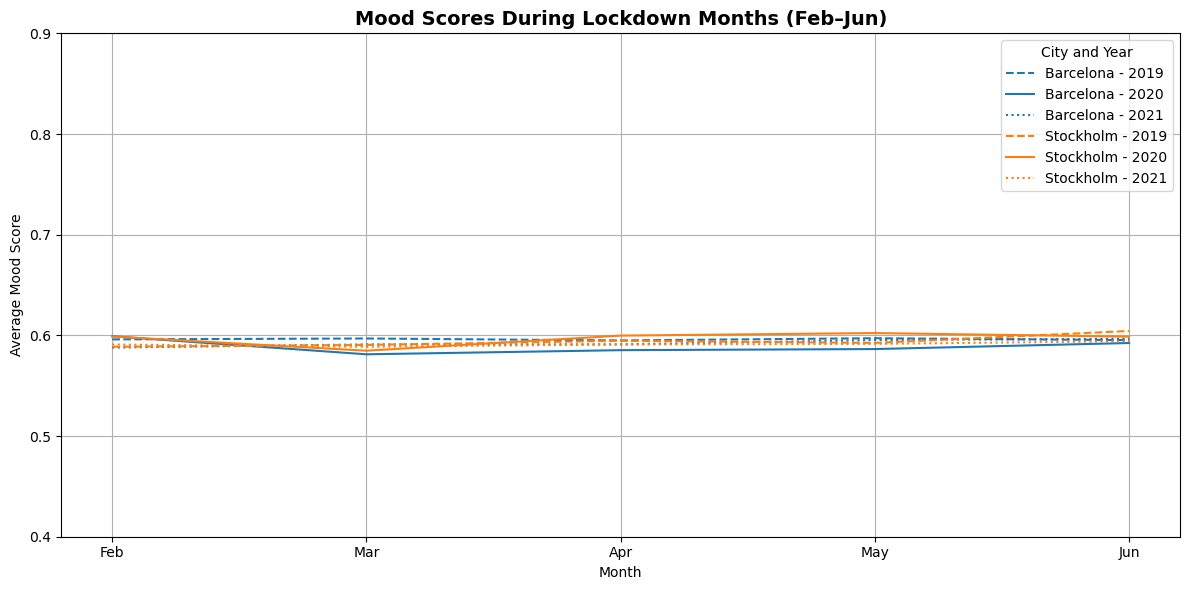

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurar formato datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Filtrar meses feb-jun y años 2019–2021
df_lockdown = df[(df['datetime'].dt.month.isin([2, 3, 4, 5, 6])) &
                 (df['datetime'].dt.year.isin([2019, 2020, 2021]))].copy()

# Añadir columnas auxiliares
df_lockdown['year'] = df_lockdown['datetime'].dt.year
df_lockdown['month'] = df_lockdown['datetime'].dt.month

# Agrupar por año, mes y ciudad
df_grouped = df_lockdown.groupby(['year', 'month', 'city']).agg(
    avg_mood=('score_x', 'mean')
).reset_index()

# Definir ciudades a comparar
ciudades = ['Barcelona', 'Stockholm']  

# Colores y estilos
colors = {
    'Barcelona': {'2019': 'tab:blue', '2020': 'tab:blue', '2021': 'tab:blue'},
    'Stockholm': {'2019': 'tab:orange', '2020': 'tab:orange', '2021': 'tab:orange'}
}
linestyles = {'2019': '--', '2020': '-', '2021': ':'}

# Plot
plt.figure(figsize=(12, 6))

for city in ciudades:
    for year in [2019, 2020, 2021]:
        data = df_grouped[(df_grouped['city'] == city) & (df_grouped['year'] == year)]
        if not data.empty:
            plt.plot(
                data['month'],
                data['avg_mood'],
                label=f"{city} - {year}",
                color=colors[city][str(year)],
                linestyle=linestyles[str(year)]
            )

# Etiquetas y formato
plt.title("Mood Scores During Lockdown Months (Feb–Jun)", fontsize=14, weight='bold')
plt.xlabel("Month")
plt.ylabel("Average Mood Score")
plt.xticks([2, 3, 4, 5, 6], ['Feb', 'Mar', 'Apr', 'May', 'Jun'])
plt.ylim(0.4, 0.9)  # Ajusta según el rango de tus datos
plt.legend(title='City and Year')
plt.grid(True)
plt.tight_layout()
plt.show()


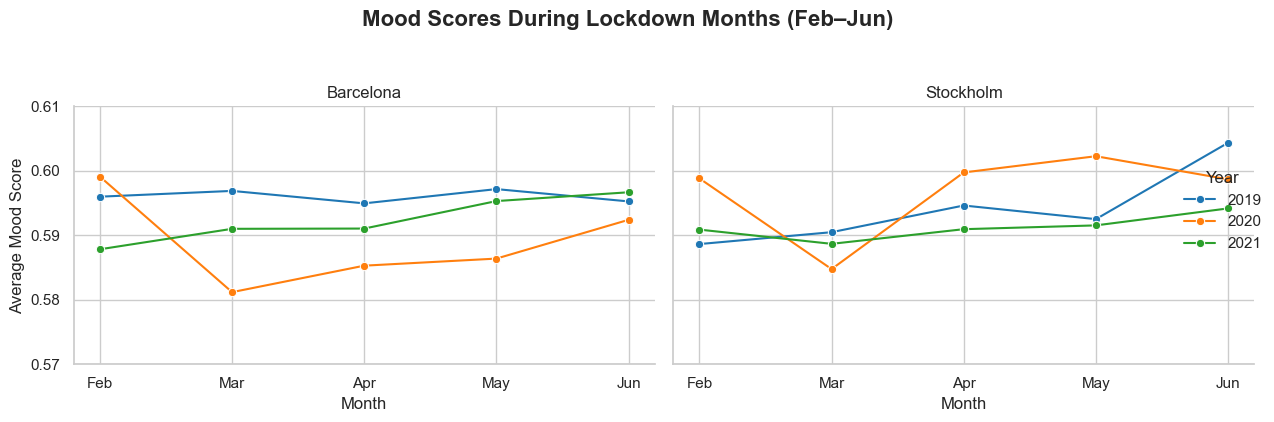

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt


df_grouped['month_name'] = df_grouped['month'].map({2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun'})

# Estilo visual
sns.set(style="whitegrid")

# Crear subgráficos por ciudad
g = sns.FacetGrid(
    df_grouped, 
    col="city", 
    hue="year", 
    height=4, 
    aspect=1.5, 
    palette="tab10"
)

# Trazar líneas por mes
g.map(sns.lineplot, "month_name", "avg_mood", marker="o")

# Ajustes de leyenda y títulos
g.add_legend(title="Year")
g.set_axis_labels("Month", "Average Mood Score")
g.set_titles("{col_name}")
g.set(ylim=(0.57, 0.61))  
plt.suptitle("Mood Scores During Lockdown Months (Feb–Jun)", fontsize=16, weight="bold", y=1.05)
plt.tight_layout()
plt.show()
